In [ ]:
# Full Names: Hamed Hatami, Amirhossein Roosta, MohammadMehdi Hesam, Seyyed Ali Emad, MohammadErfan Naderloo
# Student Numbers: 98104025, 98104166, 98104058, 98104347, 98104528

# Automated Optical Inspection (AOI) System

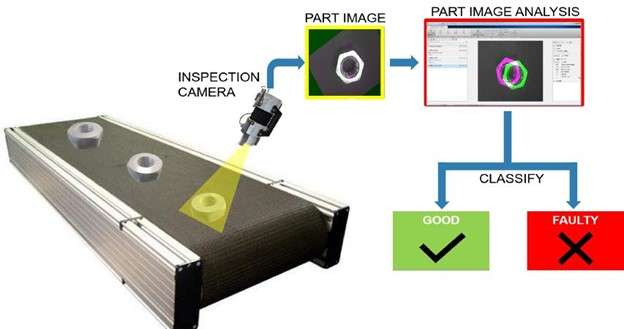

# Problem Statement

Automated inspection and defect detection systems use AI to inspect manufacturing parts for failures and defects. They are used across industries to detect flaws on manufactured surfaces such as metallic rails, semiconductor wafers, and contact lenses. Here are some examples of how companies are using automated inspection systems:

*	To detect defects in multiple elements of the aircraft
*	To inspect bevel gears used in automotive parts
*	To detect surface defects, missing parts, and cracks in railway facility components such as rails, sleepers, and fasteners

In this session, the aim is to detect defects of metal nuts such as bending and scratching.

**The description of metal_nut dataset:**
This datase (Metal_nut folder) contains 3 folders of bent, good, and scratch indicating class labels.

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Neural Networks date back decades, so why the resurgence?
* **Big data**: larger datasets - Easier collection and storage (social networks, imagenet,...)
* **Hardware**: Graphics processing units (GPU) - Massively parallelizable
* **Software**: Improved techniques - New models - Toolboxes (Tensorflow - Pytorch)

# Required libraries

**TensorFlow** is an **end-to-end** open-source software library used for dataflow programming beyond a range of tasks. It is a math library that is used for machine learning applications like neural networks.

**Keras** is an open-source neural network library written in Python. It can run on top of TensorFlow. It is defined to enable fast experimentation with deep neural networks.

**Why is TensorFlow called TensorFlow?**

TensorFlow can handle the flow (node/mathematical operation) of **Tensors**, which are data structures of multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

**Computations on Tensors**

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity.

TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

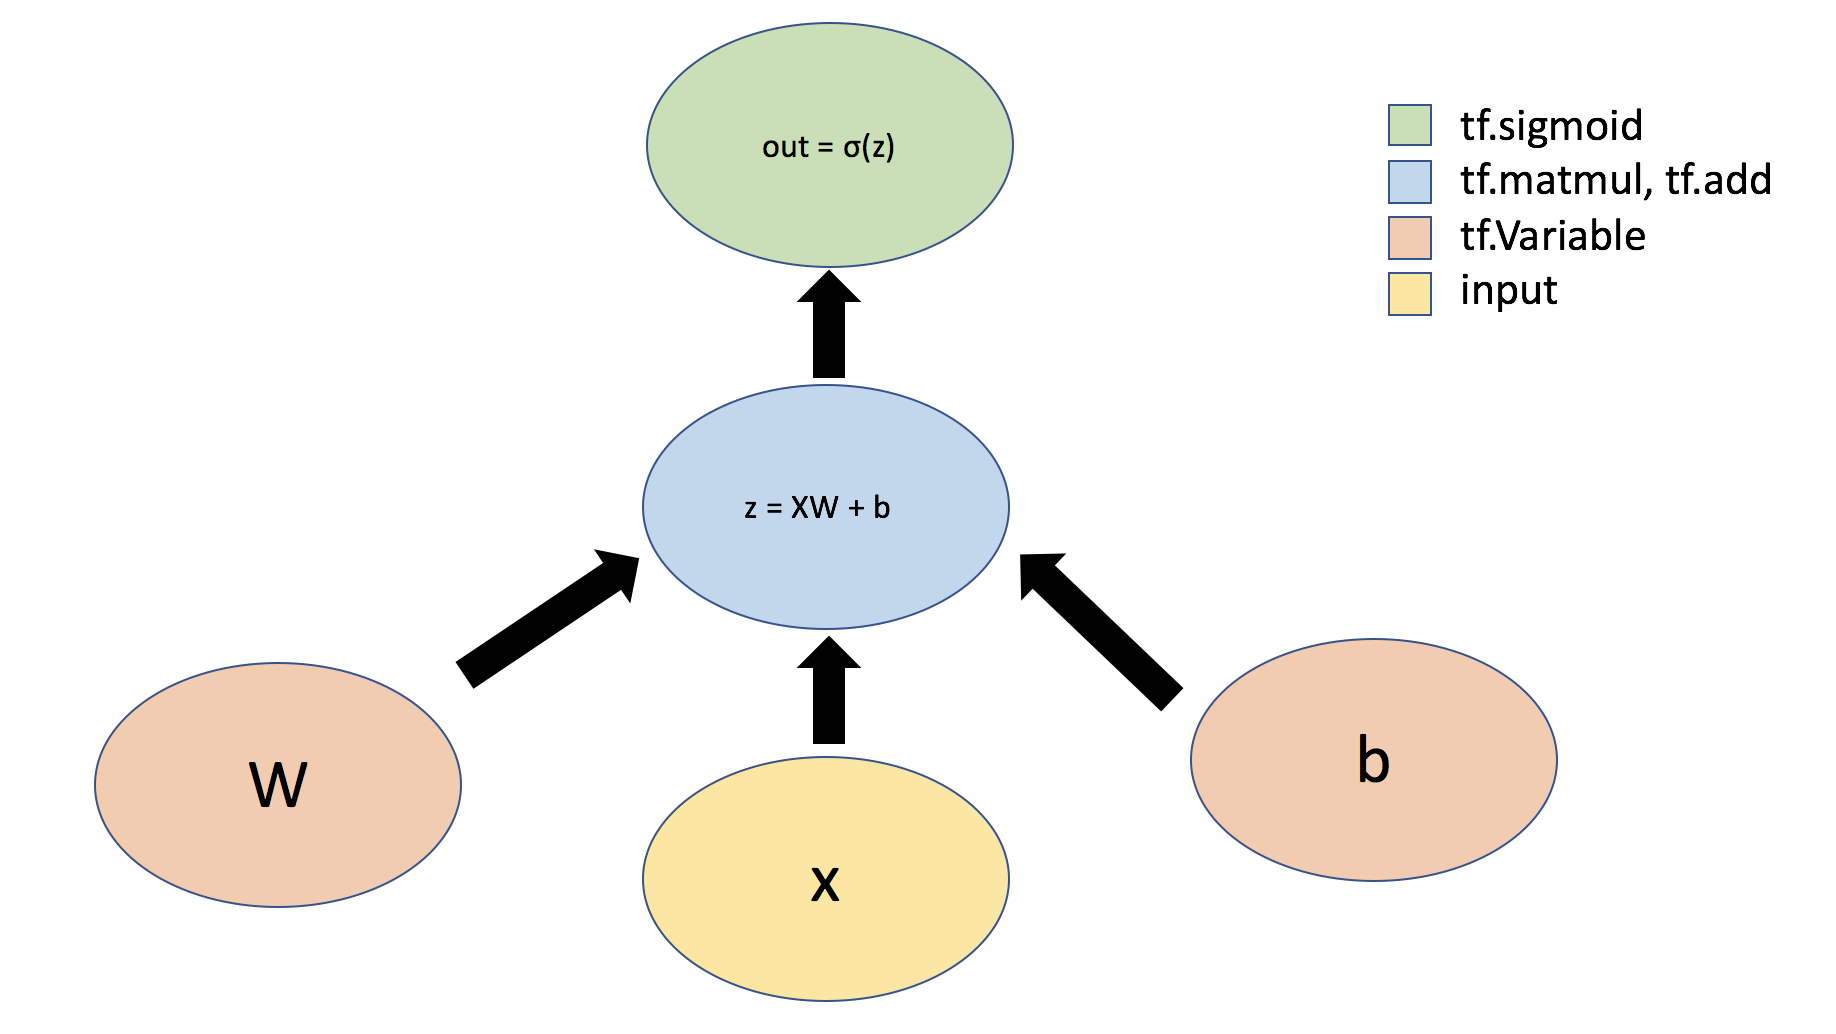

In [ ]:
import numpy as np
import tensorflow as tf

# Read metal nut dataset from Google Drive


Tensorflow/Keras preprocessing utility functions enable us to move from raw data on the disc to tf.data.Dataset object that can be used to train a model.

**Use image_dataset_from_directory() function to load metal nut image data**

image_dataset_from_directory() presents samples as a tuple of (image,label).

Image formats that are supported are: jpeg,png,bmp,gif.

Its key components are:

* **directory**: Directory where the data is located.
* **labels**: Either "inferred" (labels are generated from the directory structure)
* **label_mode**:
  * 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
  * 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
  * 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).
* **class_names**: Only valid if "labels" is "inferred". This is the explicit list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).
* **color_mode**: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
* **batch_size**: Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).
* **image_size**: Size to resize images to after they are read from disk, specified as (height, width). Defaults to (256, 256).

In [ ]:
# Read image set from Google Drive
from tensorflow.keras.utils import image_dataset_from_directory

BATCH_SIZE = 32
IMG_SIZE = [128, 128]
num_classes = 3
classes = ['bent', 'good', 'scratch']

metalnut_dataset = tf.keras.utils.image_dataset_from_directory(
          "/content/drive/MyDrive/data_ml/Metal_Nut",
           shuffle=True,        # or False
           labels='inferred',
           label_mode='int',
           batch_size= BATCH_SIZE,
           class_names= classes,
           seed = 1402,
           image_size=IMG_SIZE)

Found 70 files belonging to 3 classes.


**Concatenate batches of data**

In [ ]:
data = None
labels = None
for x, y in metalnut_dataset:
  if data is None:
    data = x
    print("data batch size:", data.shape)
  else:
    data = np.concatenate((data, x), axis = 0)
  if labels is None:
    labels = y
  else:
    labels = np.concatenate((labels, y), axis = 0)

data batch size: (32, 128, 128, 3)


# Dataset details

In [ ]:
print("Data shape: ",  data.shape)
print("Unique lables: ", np.unique(labels))
print("Total occurences of each class label:", np.bincount(labels))
print("Sample indices of Class label 0: ", np.array(np.where(labels == 0)).ravel()[:6])
print("Sample indices of Class label 1: ", np.array(np.where(labels == 1)).ravel()[:6])
print("Sample indices of Class label 2: ", np.array(np.where(labels == 2)).ravel()[:6])

Data shape:  (70, 128, 128, 3)
Unique lables:  [0 1 2]
Total occurences of each class label: [25 22 23]
Sample indices of Class label 0:  [ 2  3  5  7  9 10]
Sample indices of Class label 1:  [ 0  1  6 13 17 18]
Sample indices of Class label 2:  [ 4  8 15 19 20 26]


**Plot three images for bant, good, and scratch class labels, respectively**

**Use imshow() function to display images**

For the image to be displayed correctly, the image should be presented as an array of 8-bit unsigned integers (uint8).

Text(0.5, 1.0, 'good')

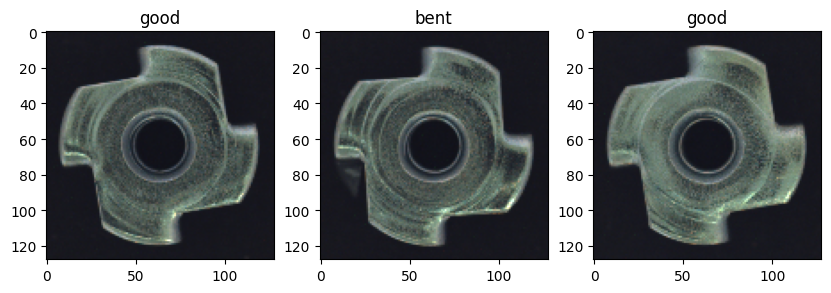

In [ ]:
from  matplotlib import pyplot as plt

# Plot
plt.figure(figsize=(10,10))

plt.subplot(1, 3, 1)
plt.imshow(data[1].astype("uint8"))
plt.title(classes[labels[1]])

plt.subplot(1, 3, 2)
plt.imshow(data[2].astype("uint8"))
plt.title(classes[labels[2]])

plt.subplot(1, 3, 3)
plt.imshow(data[0].astype("uint8"))
plt.title(classes[labels[0]])

# Split data for the model evaluation process

The dataset is usually divided at hand into training and testing sets to evaluate the performance of the models.

* Use scikit-learn’s **train_test_split()** function available through model_selection module.
  * **X**: data matrix
  * **y**: class label vector
  * **test_size**: represent the proportion of the dataset to include in the test split
  *  **stratify**:  data is split in a stratified fashion (reserving the percentage of samples for each class), using this as the class labels.
  * **random_state**: Controls the shuffling applied to the data before applying the split

**Split our dataset into 70% and 30% as train and test, respectively.**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.astype('float'),
                                                    labels,
                                                    test_size=0.3,
                                                    stratify = labels.astype('int'),
                                                    random_state=1402)

In [ ]:
print("Train data size:", X_train.shape)
print("Test data size:", X_test.shape)

Train data size: (49, 128, 128, 3)
Test data size: (21, 128, 128, 3)















# Normalize image data

In [ ]:
print(np.max(X_train), np.min(X_train))
X_train  /= 255.
X_test  /= 255.

255.0 13.0


# **Fully connected neural network (FFNN/MLP) model**

# Perceptron

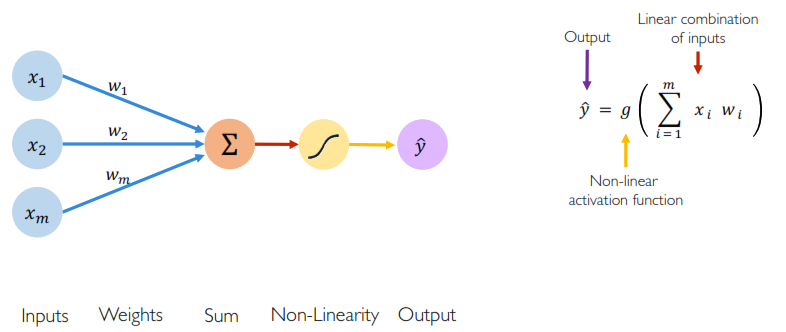

**Activation Functions:**

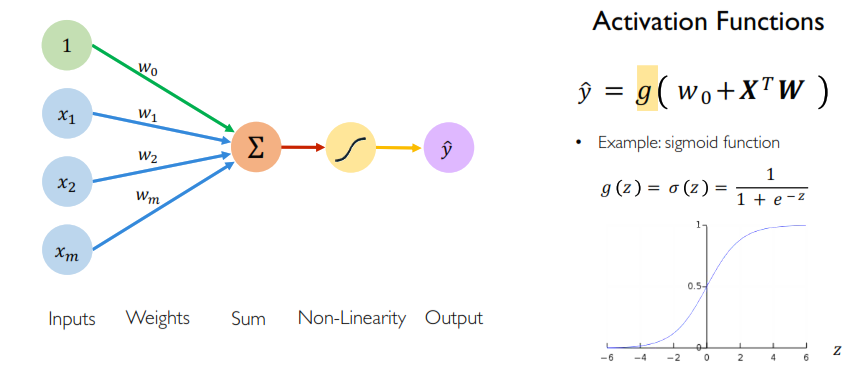

**Common Activation Functions:**

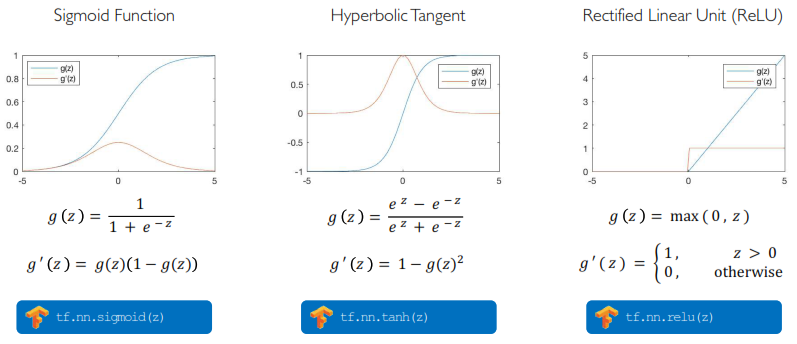

**The simplified version of Perceptron**

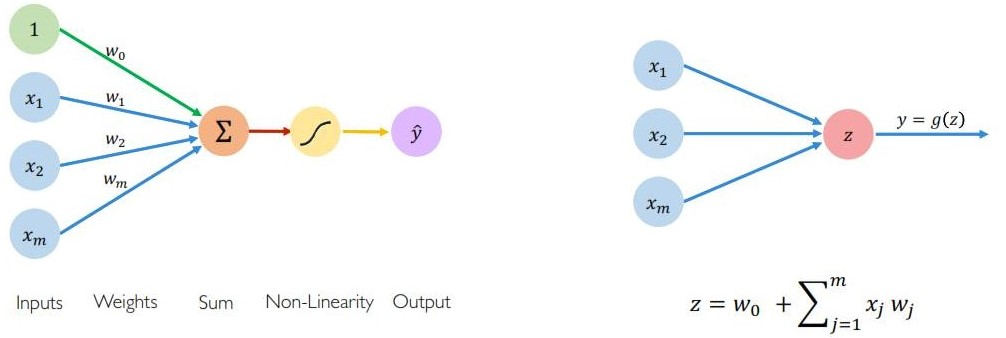

# Single layer neural network

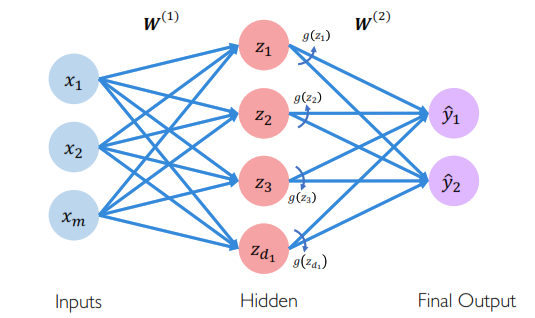

# Deep neural network

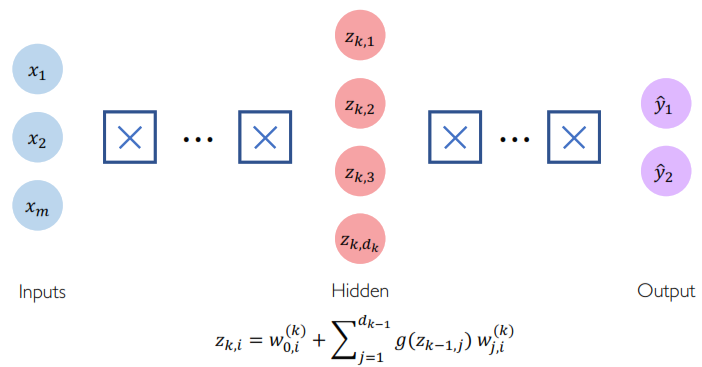

# Loss function

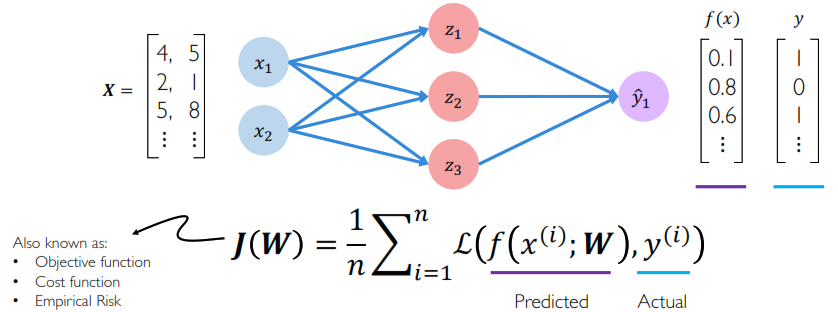

**Cross Entropy loss:**

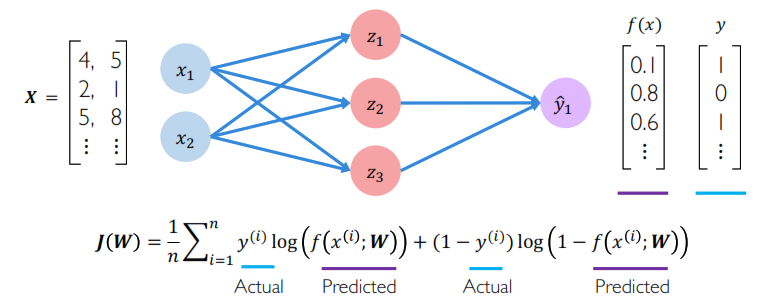

# Loss Optimization

 we want to find the network weights that achieve the lowest loss.

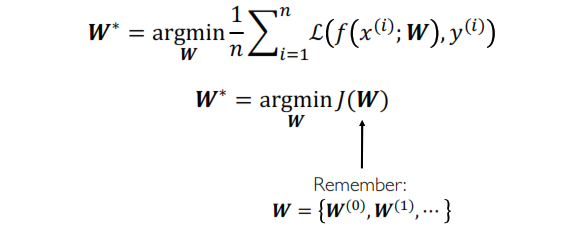

**Training neural networks is difficult**

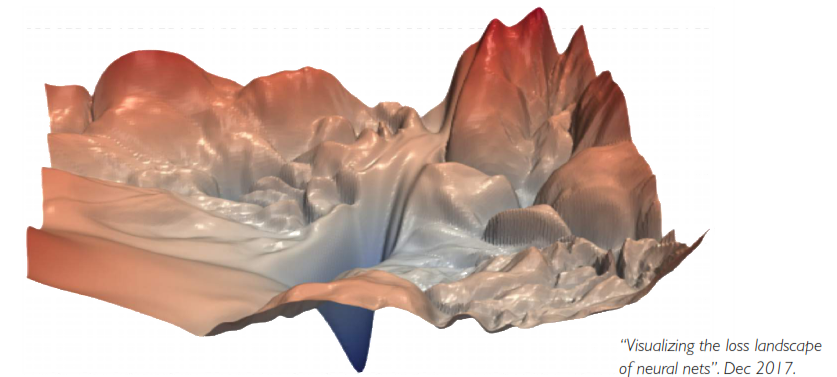

**Gradient Descent**

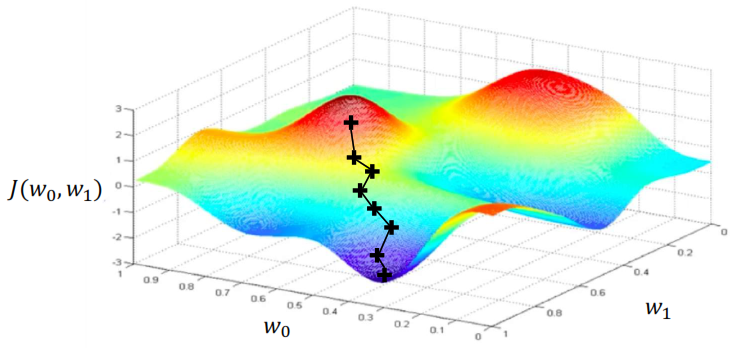

**How can we set the learning rate?**

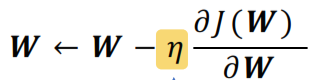

**Adaptive learning rates:**

* Learning rates are no longer fixed
* Can be made larger or smaller

# Adaptive optimizers:
- **Adam**: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
  - tf.keras.optimizers.Adam - "Adam"

- **Adagrad**: AdaGrad is designed to specifically explore the idea of automatically tailoring the step size for each dimension in the search space.
  - tf.keras.optimizers.Adagrad -  "Adagrad"

- **RMSprop**: RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.
   - tf.keras.optimizers.RMSprop - "RMSprop"

- **Adadelta**: Adadelta is an extension of AdaGrad and RMSProp and changes the calculation of the custom step size so that the units are consistent and in turn no longer requires an initial learning rate hyperparameter.
  - tf.keras.optimizers.Adadelta - "Adadelta"



# Mini batches

* More accurate estimation of gradient:
  - Smoother convergence
  - Allows for larger learning rates
* Mini-batches lead to fast training!
  - Can parallelize computation + achieve significant speed increases on GPU's

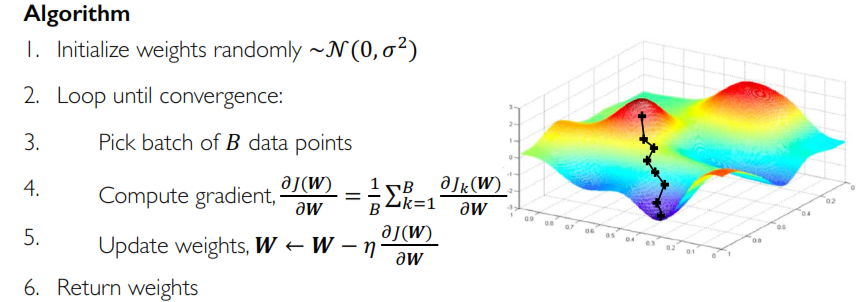

# The problem of overfitting
**I) Dropout**:
  - During training, randomly set some activations to 0
  - Typically drop 50% of activations in layer

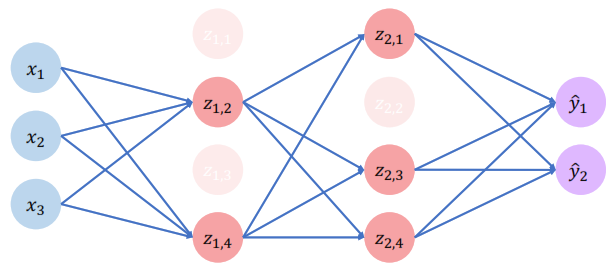

**II) Early stopping**:
  - Stop training before we have a chance to overfit

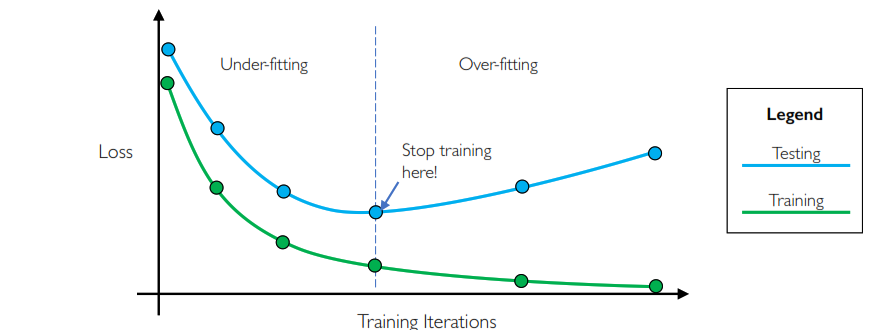

**Build a simple neural network consisting of two fully connected layers and apply this to the metal nut data for the classification task.**

TensorFlow has defined a number of Layers that are commonly used in neural networks, for example a Dense. We'll use the Sequential model from Keras and two Dense layers to define our network. With the Sequential API, we can readily create neural networks by stacking together layers like building blocks.

* We first use a Flatten layer, which flattens the input so that it can be fed into the model.
  - The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (128 x 128 pixels), to a 1d-array of 128 * 128 = 16384 pixels. This layer can unstack rows of pixels in the image and line them up. There are no learned parameters in this layer; it only reformats the data.
  -  A Flatten layer has no parameters to train. This layer converts an array like an image into a vector.

* After the pixels are flattened, the network consists of a sequence of three **Dense** layers. These are fully-connected neural layers. The first Dense layer has 1024 nodes (or neurons). The second layer has 512 neurons and the third layer should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the class labels.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

INPUT_SHAPE = X_train.shape[1:]

mlp_model = Sequential()

# First define a Flatten layer
mlp_model.add(Flatten(input_shape = INPUT_SHAPE))

# Define the activation function for the first fully connected (Dense) layer
mlp_model.add(Dense(1024, activation='relu'))
mlp_model.add(Dropout(0.5, seed = 1402))

# Define the activation function for the second fully connected (Dense) layer
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dropout(0.5, seed = 1402))

# Define the third Dense layer to output the classification probabilities
mlp_model.add(Dense(num_classes, activation='softmax'))

**In order to update the model later on, we'll need to re-run the above cell to re-initialize the model.**

In [ ]:
ffnn_model = Sequential([
    Flatten(input_shape = INPUT_SHAPE),


    Dense(1024, activation='relu'),
    Dropout(0.5, seed = 1402),

    Dense(512, activation='relu'),
    Dropout(0.5, seed = 1402),


    Dense(num_classes, activation='softmax')])

# Model Summarization

**Use summary() function to print a string summary of the network.**

In [ ]:
# Print the summary of the layers in the model.
print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 50,859,011
Trainable params: 50,859,011
No

# Plot MLP model

**Use plot_model() function to visulaize a Keras model and save to a file**

Its key components are as follows:
  - **model**: A Keras model instance
  - **to_file**: File name of the plot image.
  - **show_shapes**: whether to display shape information.
  - **show_dtype**: whether to display layer dtypes.
  - **show_layer_names**: whether to display layer names.
  - **show_layer_activations**: Display layer activations (only for layers that have an activation property).

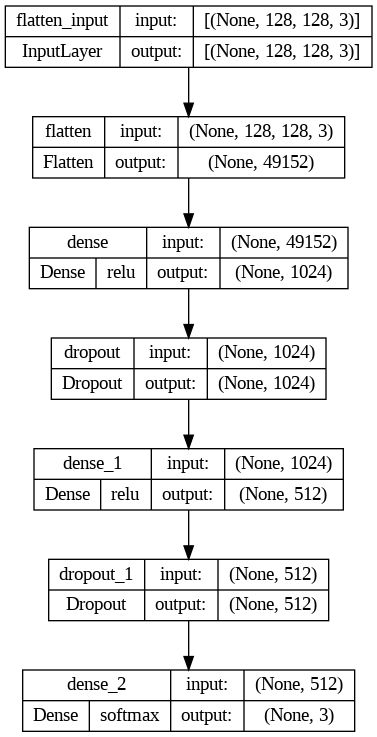

In [ ]:
from tensorflow.keras.utils import plot_model

# plot the model
plot_model(mlp_model, to_file='mlp_model_discribe_plot.png', show_shapes = True,
           show_layer_names = True, show_layer_activations= True)

# Compile MLP model

Before training the model, we need to define a few more settings. These are added during the model's compile step:

- **Loss function** — This defines how we measure how accurate the model is during training.
- **Optimizer** — This defines how the model is updated based on the data it sees and its loss function.
- **Metrics** — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the accuracy, the fraction of the images that are correctly classified.

We use the cross entropy loss to perform a classification task.

In [ ]:
# Compile the model
mlp_model.compile(loss = 'SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])


# Train MLP model

We're now ready to train our model, which will involve feeding the training data (train_images and train_labels) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the metal nut dataset, to use during training.

After defining the model settings in the compile step, we can also accomplish training by calling the fit method on an instance of the Model class. We will use this to train our fully connected model.

In [ ]:
BATCH_SIZE = 32
EPOCHS = 30

history = mlp_model.fit(X_train, y_train, validation_split=0.2, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/30
2/2 [==============================] - 5s 1s/step - loss: 6.9650 - accuracy: 0.2308 - val_loss: 16.7247 - val_accuracy: 0.3000
Epoch 2/30
2/2 [==============================] - 2s 822ms/step - loss: 24.0061 - accuracy: 0.3846 - val_loss: 23.2502 - val_accuracy: 0.5000
Epoch 3/30
2/2 [==============================] - 2s 737ms/step - loss: 28.1456 - accuracy: 0.2564 - val_loss: 27.8573 - val_accuracy: 0.2000
Epoch 4/30
2/2 [==============================] - 2s 1s/step - loss: 25.8160 - accuracy: 0.4359 - val_loss: 40.9679 - val_accuracy: 0.3000
Epoch 5/30
2/2 [==============================] - 4s 2s/step - loss: 31.1583 - accuracy: 0.4103 - val_loss: 20.6933 - val_accuracy: 0.2000
Epoch 6/30
2/2 [==============================] - 4s 887ms/step - loss: 21.7191 - accuracy: 0.3590 - val_loss: 11.7187 - val_accuracy: 0.3000
Epoch 7/30
2/2 [==============================] - 2s 1s/step - loss: 21.3599 - accuracy: 0.3846 - val_loss: 13.0022 - val_accuracy: 0.5000
Epoch 8/30
2/2 [===

# Plot loss & accuracy during training

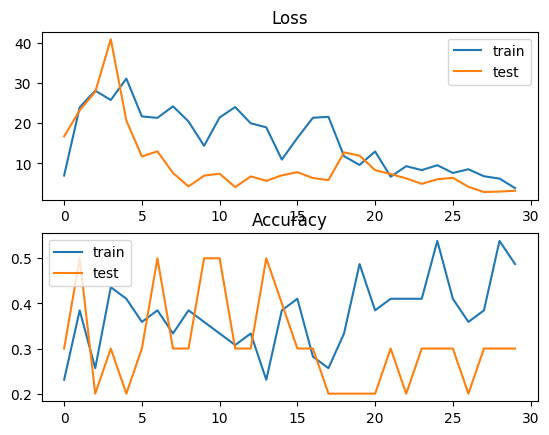

In [ ]:
# plot loss during training
plt.subplot(2, 1, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

# plot accuracy during training
plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.show()

The accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting, when a machine learning model performs worse on new data than on its training data.

# Evaluate MLP Model

**Use evaluate() function to assess the model on test data.**

In [ ]:
# evaluate the model
_, train_acc = mlp_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = mlp_model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy for MLP model: %.4f' % train_acc)
print('Test Accuracy for MLP model: %.4f' % test_acc)

Train Accuracy for MLP model: 0.5306
Test Accuracy for MLP model: 0.3333


* **Use confusion_matrix() to evaluate the model performance for predicting each class label**
* **Use ConfusionMatrixDisplay() for Confusion Matrix visualization**

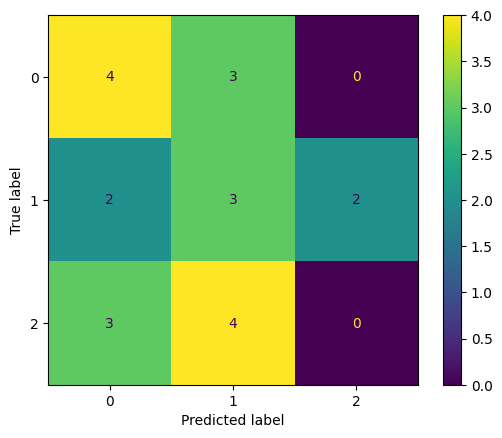

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predict probabilities for the test set
y_probs = mlp_model.predict(X_test, verbose = 0)
y_pred = np.argmax(y_probs, axis = 1)

conf_mat = confusion_matrix(y_test, y_pred, labels = np.unique(y_train))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=np.unique(y_train))
disp.plot()
plt.show()

# Data Augmentation

When we work on a machine learning problem related to images, not only we need to collect some images as training data, but also we need to employ augmentation to create variations in the image. It is especially true for more complex object recognition problems.

* **RandomZoom()** function randomly zooms in or zooms out on an image.
  - **height_factor**: height_factor=(-a,+b) represents lower and upper bound for zooming vertically. height_factor=a is used for both the upper and lower bound.
  - **width_factor**: width_factor=(-a,+b) represents lower and upper bound for zooming horizontally. width_factor=a is used for both the upper and lower bound.
  - **fill_mode**: points outside the boundaries of the input are filled according to the given mode (one of {"constant", "reflect", "wrap", "nearest"}).
  - **fill_value**: a float represents the value to be filled outside the boundaries when fill_mode="constant".

* **RandomContrast()** function randomly increases/reduces contrast.
  - **factor**: factor=(-a,+b) represents lower and upper bound. For factor=a, lower = upper. The contrast factor will be randomly picked between [1.0 - lower, 1.0 + upper]. For any pixel x, the output will be (x - mean) * factor + mean.

* **RandomBrightness()** function randomly increases/reduces the brightness for the input RGB images.
  - **factor**: a float or a list of 2 floats between -1.0 and 1.0. factor=(-a,+b) is used to determine the lower bound and upper bound of the brightness adjustment. A float value will be chosen randomly between the limits. When -1.0 is chosen, the output image will be black, and when 1.0 is chosen, the image will be fully white.
  
* **RandomFlip()** function randomly flips each image horizontally and vaertically.
  - **mode**: can be "horizontal", "vertical", or "horizontal_and_vertical". Defaults to "horizontal_and_vertical". "horizontal" is a left-right flip and "vertical" is a top-bottom flip.

* **RandomTranslation()** function randomly translates each image.
  - **height_factor**: height_factor=(-a, +b) represents lower and upper bound for shifting vertically. A negative value means shifting image up, while a positive value means shifting image down.  height_factor=a is used for both the upper and lower bound.
  - **width_factor**:  width_factor=(-a, +b) represents lower and upper bound for shifting horizontally. A negative value means shifting image left, while a positive value means shifting image right.  width_factor =a is used for both the upper and lower bound.
  - **fill_mode**: points outside the boundaries of the input are filled according to the given mode (one of {"constant", "reflect", "wrap", "nearest"}).

* **RandomRotation()** function randomly rotates each image.
  - **factor**: factor=(-a, +b) represents lower and upper bound for rotating clockwise and counter-clockwise. A positive values means rotating counter clock-wise, while a negative value means clock-wise. factor=a is used for both the upper and lower bound.
  - **fill_mode**: points outside the boundaries of the input are filled according to the given mode (one of {"constant", "reflect", "wrap", "nearest"}).

**Use imshow() function to display images**

For the image to be displayed correctly, the image should be presented as an array of 8-bit unsigned integers (uint8).

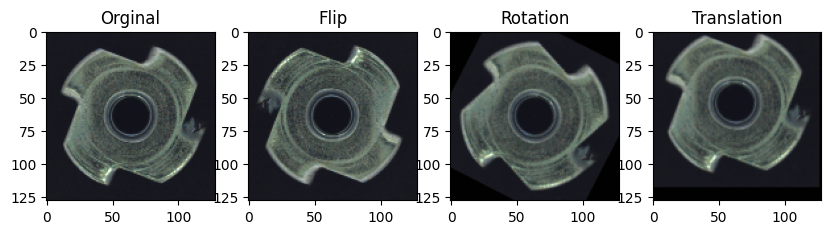

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomZoom, RandomBrightness, RandomContrast

flip = RandomFlip("horizontal_and_vertical",  seed=1402) # or "horizontal", "vertical"
rotate = RandomRotation(factor=(-0.3, 0.2),  fill_mode="constant", fill_value= 1, seed=1402)
translation = RandomTranslation(height_factor=(-0.3, 0.2),  width_factor=(-0.3, 0.2),
                                fill_mode="constant", fill_value=1, seed=1402)

#zoom = RandomZoom(height_factor=0.3, width_factor=0.2, fill_mode="constant", fill_value=1, seed=1402)
#brightness = RandomBrightness(factor=0.5, seed=1402)
#contrast = RandomContrast(factor=0.5, seed=1402)

plt.figure(figsize=(10,10))
plt.subplot(1, 4, 1)
plt.imshow(data[10].astype("uint8"))
plt.title("Orginal")

plt.subplot(1, 4, 2)
plt.imshow(flip(data[10]).numpy().astype("uint8"))
plt.title("Flip")

plt.subplot(1, 4, 3)
plt.imshow(rotate(data[10]).numpy().astype("uint8"))
plt.title("Rotation")

plt.subplot(1, 4, 4)
plt.imshow(translation(data[10]).numpy().astype("uint8"))
plt.title("Translation")

plt.show()

**Use RandomFlip(), RandomRotation(), and RandomTranslation() functions; and add variations of images to original image data**

In [ ]:
# Create preprocessing layers

flip = RandomFlip("horizontal_and_vertical",  seed=1402) # or "horizontal", "vertical"
rotate = RandomRotation(factor=(-0.3, 0.2),  fill_mode="constant", fill_value=1, seed=1402)
translation = RandomTranslation(height_factor=(-0.3, 0.2),  width_factor=(-0.3, 0.2),
                                fill_mode="constant", fill_value=1, seed=1402)

img_size = 128
num_op_augm = 3
num_smpl = X_train.shape[0]

X_train_ext = np.zeros((num_smpl*(num_op_augm+1), img_size, img_size, 3))
y_train_ext = np.zeros(num_smpl * (num_op_augm+1), dtype = int)

X_train_ext [0: num_smpl, :, :] = X_train
X_train_ext [num_smpl:2*num_smpl, :, :] = flip(X_train)
X_train_ext [2*num_smpl:3*num_smpl, :, :] = rotate(X_train)
X_train_ext [3*num_smpl:4*num_smpl, :, :] = translation(X_train)

y_train_ext[0:4*num_smpl] = np.tile(y_train, num_op_augm+1)

In [ ]:
print("Extended train data size: ", X_train_ext.shape)

Extended train data size:  (196, 128, 128, 3)


# Pretrained models (VGG16)

**Keras Applications** are deep learning models (such as VGG16, VGG19, & MobileNet) that are made available alongside pre-trained weights. These models can be used for **prediction**, **feature extraction**, and **fine-tuning**.

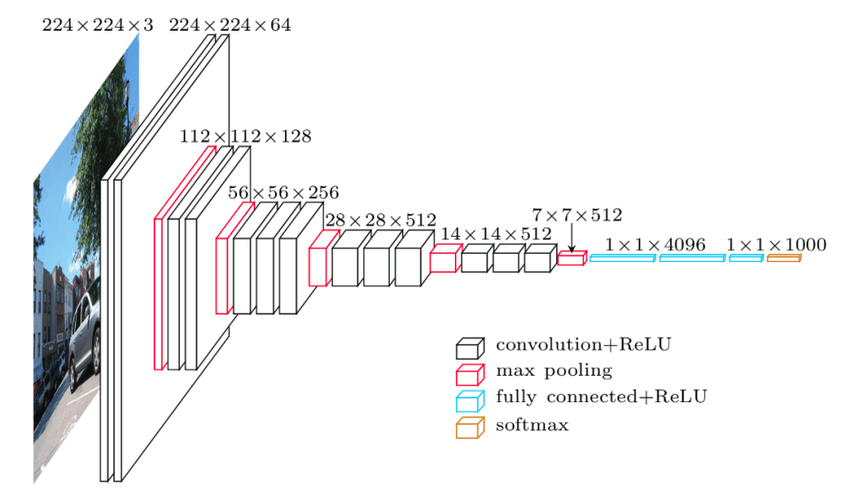

VGG-16 is object detection and classification algorithm with 16 layers deep. We can load a pretrained version of the network trained on more than a million images from the **ImageNet**. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

Its key components are as follows:
  - **include_top**: whether to include the 3 fully-connected layers at the top of the network.
  - **weights**: one of None (random initialization), or 'imagenet' (pre-training on ImageNet).

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16_model = VGG16(weights="imagenet", include_top=False)
features_train_ext = vgg16_model.predict(X_train_ext, verbose = 1)
features_test = vgg16_model.predict(X_test, verbose = 1)

1/1 [==============================] - 4s 4s/step


In [ ]:
print("Extracted train feature dimension", features_train_ext.shape)
print("Extracted test feature dimension", features_test.shape)

Extracted train feature dimension (196, 4, 4, 512)
Extracted test feature dimension (21, 4, 4, 512)


**Build MLP model for two fully connected layers and apply this model to the extracted features for the classification task.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

INPUT_SHAPE = features_train_ext.shape[1:]

mlp_vgg16_model = Sequential()

# First define a Flatten layer
mlp_vgg16_model.add(Flatten(input_shape = INPUT_SHAPE))

# Define the activation function for the first fully connected (Dense) layer
mlp_vgg16_model.add(Dense(1024, activation = 'relu'))
mlp_vgg16_model.add(Dropout(0.5, seed = 1402))

# Define the activation function for the second fully connected (Dense) layer
mlp_vgg16_model.add(Dense(512, activation = 'relu'))
mlp_vgg16_model.add(Dropout(0.5, seed = 1402))

# Define the third Dense layer to output the classification probabilities
mlp_vgg16_model.add(Dense(num_classes, activation = 'softmax'))

**In order to update the model later on, we'll need to re-run the above cell to re-initialize the model.**

# Compile and Train MLP model

In [ ]:
# Compile the model
mlp_vgg16_model.compile(loss = 'SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20

history = mlp_vgg16_model.fit(features_train_ext, y_train_ext, batch_size=BATCH_SIZE, validation_split=0.3, epochs=EPOCHS)

Epoch 1/20
5/5 [==============================] - 2s 176ms/step - loss: 4.2149 - accuracy: 0.2993 - val_loss: 2.9600 - val_accuracy: 0.2881
Epoch 2/20
5/5 [==============================] - 1s 135ms/step - loss: 2.4303 - accuracy: 0.3650 - val_loss: 1.8385 - val_accuracy: 0.3898
Epoch 3/20
5/5 [==============================] - 1s 143ms/step - loss: 2.5565 - accuracy: 0.3650 - val_loss: 1.7637 - val_accuracy: 0.2881
Epoch 4/20
5/5 [==============================] - 1s 135ms/step - loss: 2.1128 - accuracy: 0.3577 - val_loss: 1.5645 - val_accuracy: 0.3220
Epoch 5/20
5/5 [==============================] - 1s 131ms/step - loss: 1.6512 - accuracy: 0.4015 - val_loss: 1.1821 - val_accuracy: 0.3898
Epoch 6/20
5/5 [==============================] - 1s 177ms/step - loss: 1.5375 - accuracy: 0.4015 - val_loss: 1.1287 - val_accuracy: 0.2881
Epoch 7/20
5/5 [==============================] - 1s 169ms/step - loss: 1.3552 - accuracy: 0.3650 - val_loss: 1.1051 - val_accuracy: 0.4407
Epoch 8/20
5/5 [====

# Plot loss & accuracy during training

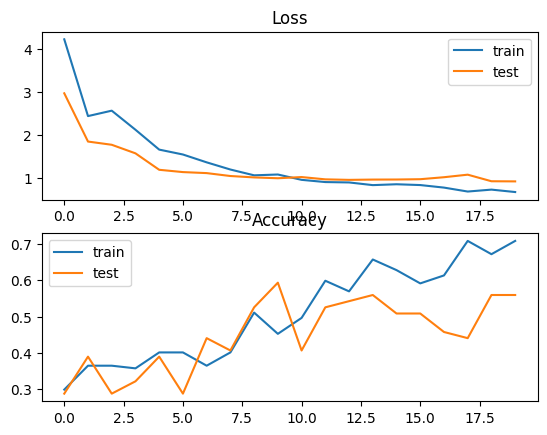

In [ ]:
# plot loss during training
plt.subplot(2, 1, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label ='test')
plt.legend()

# plot accuracy during training
plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label ='train')
plt.plot(history.history['val_accuracy'], label ='test')
plt.legend()
plt.show()

# Evaluate MLP Model

In [ ]:
# evaluate the model
_, train_acc = mlp_vgg16_model.evaluate(features_train_ext, y_train_ext, verbose=0)
_, test_acc = mlp_vgg16_model.evaluate(features_test, y_test, verbose=0)
print('Train Accuracy for MLP_VGG16 model: %.4f' % train_acc)
print('Test Accuracy for MLP_VGG16 model: %.4f' % test_acc)

Train Accuracy for MLP_VGG16 model: 0.7194
Test Accuracy for MLP_VGG16 model: 0.7619


* **Use confusion_matrix() to evaluate the model performance for predicting each class label**
* **Use ConfusionMatrixDisplay() for Confusion Matrix visualization**

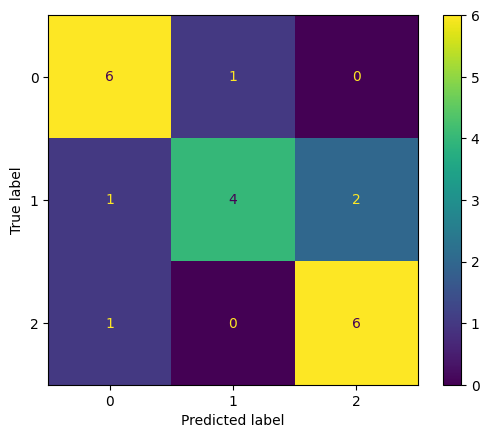

In [ ]:
# predict probabilities for test set
y_probs = mlp_vgg16_model.predict(features_test, verbose = 0)
y_pred = np.argmax(y_probs, axis = 1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
#print( conf_mat )
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=np.unique(y_train))
disp.plot()
plt.show()